# Importing Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_columns',15)
pd.set_option('display.max_rows',100)

# Importing Dataset

In [3]:
df = pd.read_csv("C:\\Users\\MEENAKASHI\\OneDrive\\Desktop\\Datasets\\train.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape

(891, 12)

# Descriptive Analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.describe(include = "object")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Hippach, Miss. Jean Gertrude",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


In [8]:
df.describe(include = 'int64')

,PassengerId,Survived,Pclass,SibSp,Parch
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.523008,0.381594
std,257.353842,0.486592,0.836071,1.102743,0.806057
min,1.000000,0.000000,1.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,0.000000,0.000000
75%,668.500000,1.000000,3.000000,1.000000,0.000000
max,891.000000,1.000000,3.000000,8.000000,6.000000


In [9]:
df.describe(include = "float")

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [10]:
#Rowwise missing value
miss = []
for i in range(df.shape[0]):
    miss.append(df.iloc[i].isnull().sum())
    for j in range(len(miss)):
        if miss[i] >=6:
            
            df.drop(index = i,inplace = True)
        else:
            pass
df.shape

(891, 12)

In [11]:
#column wise missing value
for col in df.columns:
    miss = (df[col].isnull().sum()/df.shape[0])*100
    miss = round(miss,2)
    
    if miss >= 25:
        df = df.drop(col,axis = 1)
    elif df[col].dtype != "float64":
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())
        
print(df.shape)

(891, 11)


# Droping Non influencing variable

In [12]:
df.drop(["PassengerId","Name"],axis = 1,inplace = True)

# Correlation cheacking

In [13]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500
Age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688
SibSp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000


In [14]:
df = df.drop(["Ticket"],axis = True)


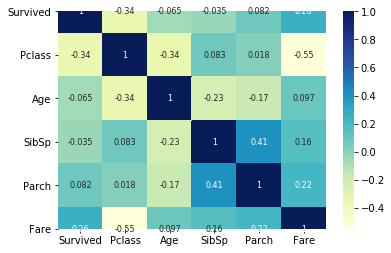

In [15]:
#Correlation plot
cor = df.corr()
sns.heatmap(cor,annot = True,cmap='YlGnBu',annot_kws={"size": 8}, square=False)

In [16]:
def uni(x):
    u = x.unique()
    return u

In [17]:
df_ob = df.select_dtypes(include = 'object')
df_int = df.select_dtypes(exclude = 'object')

In [18]:
uniq_obj = {col:uni(df[col])for col in df_ob}
uniq_obj

{'Sex': array(['male', 'female'], dtype=object),
 'Embarked': array(['S', 'C', 'Q'], dtype=object)}

# Chi Square Analysis

In [19]:
def cr_tb(x,y):
    
    crotab = pd.crosstab(x,y)   #cross tab
    act_cr = crotab.copy()  #copy of crosstab for future use(act_cr)
    
    val1  =  []  #rowise frequency sum
    val2  =  []   #columnwise frequency sum
    
    
   
    #Rowise summation frequency
    
    for i in range(crotab.shape[0]):
        sum1 = 0
        for j in range(crotab.shape[1]):
            sum1 = sum1 + crotab.iloc[i,j]
            if j == crotab.shape[1]-1:
                val1.append(sum1)
                
    #columnwise summation frequency
    for l in range(1):
        for m in range(crotab.shape[1]):
            sum2 = 0
            
            for n in range(crotab.shape[0]):
            
                sum2 = sum2 + crotab.iloc[n,m]
                
                if n == crotab.shape[0]-1:
                    val2.append(sum2)
    row_sum = val1.copy()
    col_sum = val2.copy()
    
    tot = 0
#     tot_list = row_sum + col_sum #to make totol frequency adding those two rowise and column wise list to make total
#     print(tot_list)
    for each in row_sum:
        tot = tot+each
        
    return row_sum,col_sum,tot,crotab,act_cr

In [20]:
def chi_fre(x,y):  
    row_sum,col_sum,cr_tot,cr,act_cr = cr_tb(x,y)
    
    
    expected = []
    for row in row_sum:
        for col in col_sum:
            
            expected.append((row*col)/cr_tot)
            
                  
#     print(expected)
    ob = act_cr.values.tolist()
    observed = [y for x in ob for y in x]
    

#     print(observed)
    chi = 0
    for i in range(len(expected)):
        chi = chi+(((observed[i]-expected[i])**2)/expected[i])
        
    return chi

In [21]:
def cr_df(x,y):
    row_sum,col_sum,cr_tot,cr,act_cr = cr_tb(x,y)  
    cr["freq_sum"] = row_sum
    col = col_sum +[cr_tot]
    cr.loc["freq_sum"] = col
    return cr,act_cr



In [22]:
def result(x,y):
    from scipy.stats import chi2

    cr,act_cr = cr_df(x,y)
    contigency_tab,normal_cross_tab = cr_df(x,y)
    
    print(normal_cross_tab,"\n")
    print("**************************************************\n")
    
    print(contigency_tab)

    dfree = (act_cr.shape[0]-1)*(act_cr.shape[1]-1)
    
    print("***************************************************")
    
    table_value = chi2.ppf(0.05, dfree )

    print('Degree of freedom "{}" with significane level of "{}" and the table value is \"{}\" \n"'.format(dfree,0.05,table_value))


    chi = chi_fre(x,y) 

    print("stats is {}".format(chi))
    
    if table_value<chi:
        print("\nHence There is Realtionship is Exist b/w Two Varibale")
    else:
        print("\nHence There is No Realtionship is Exist b/w Two Varibale")
        

In [23]:
result(df["Survived"],df["Sex"])

Sex       female  male
Survived              
0             81   468
1            233   109 

**************************************************

Sex       female  male  freq_sum
Survived                        
0             81   468       549
1            233   109       342
freq_sum     314   577       891
***************************************************
Degree of freedom "1" with significane level of "0.05" and the table value is "0.003932140000019522" 
"
stats is 263.05057407065567

Hence There is Realtionship is Exist b/w Two Varibale


In [24]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# Dummy Variable Imputation

In [25]:
im_sex = pd.get_dummies(df["Sex"])
df = df.drop(["Sex"],axis = 1)

df = pd.concat([df,im_sex],axis = 1)

In [26]:
df[df["Survived"]==0].groupby("Embarked")["Survived"].count()


# hpl = me_data.groupby("HispanicLatino")["PayRate"].median()

Embarked
C     75
Q     47
S    427
Name: Survived, dtype: int64

In [27]:
pd.crosstab(df["Survived"],df["Embarked"])

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,219


In [28]:
embar_dum = pd.get_dummies(df["Embarked"])
df.drop(["Embarked"],axis = 1,inplace = True)
df =pd.concat([df,embar_dum],axis = 1)

# Scalling & Seprating Feature and target variable

In [29]:
feature = df.iloc[:,1:]
target = df.iloc[:,0]


In [30]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(feature)

scaled = scale.transform(feature)

scaled_df = pd.DataFrame(data = scaled, columns = feature.columns)


In [31]:
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

# Train and Test Split

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(feature,target,test_size = 0.3,random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(623, 10)
(268, 10)
(623,)
(268,)


In [33]:
from sklearn.linear_model import LogisticRegression
logi_mod = LogisticRegression()
logi_mod.fit(X_train,y_train)
pred_y = logi_mod.predict(X_test)


In [34]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(pred_y,y_test))
print(confusion_matrix(pred_y,y_test))


              precision    recall  f1-score   support

           0       0.87      0.82      0.84       166
           1       0.73      0.79      0.76       102

    accuracy                           0.81       268
   macro avg       0.80      0.81      0.80       268
weighted avg       0.81      0.81      0.81       268

[[136  30]
 [ 21  81]]


# Skew Cheacking and model building

In [35]:
feature_back = feature.copy()

In [36]:
from scipy.stats import stats
conti = feature.select_dtypes(include = 'float64' )
for col in conti:
    b_skew = feature[col].skew()
#     print(b_skew)
    log_feat = np.log1p(feature[col])
    a_skew = log_feat.skew()
#     print(a_skew)
    if abs(a_skew) < 0.50:
        if abs(b_skew )> abs(a_skew):
            print("Transformed Variable")
            print("******************")
            print(col)
            feature[col] = log_feat
        else:
            feature[col] = feature[col]
    else:
        feature[col] = feature[col]
        


Transformed Variable
******************
Fare


In [37]:
X_train,X_test,y_train,y_test = train_test_split(feature,target,test_size = 0.3)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(623, 10)
(268, 10)
(623,)
(268,)


In [38]:
from sklearn.linear_model import LogisticRegression
logi_modlog = LogisticRegression()
logi_modlog.fit(X_train,y_train)
pred_ylog = logi_modlog.predict(X_test)


In [39]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(pred_ylog,y_test))
print(confusion_matrix(pred_ylog,y_test))


              precision    recall  f1-score   support

           0       0.89      0.82      0.86       182
           1       0.68      0.79      0.73        86

    accuracy                           0.81       268
   macro avg       0.79      0.81      0.79       268
weighted avg       0.82      0.81      0.82       268

[[150  32]
 [ 18  68]]


In [40]:
feature

,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,3,22.0,1,0,2.110213,0,1,0,0,1
1,1,38.0,1,0,4.280593,1,0,1,0,0
2,3,26.0,0,0,2.188856,1,0,0,0,1
3,1,35.0,1,0,3.990834,1,0,0,0,1
4,3,35.0,0,0,2.202765,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,2.639057,0,1,0,0,1
887,1,19.0,0,0,3.433987,1,0,0,0,1
888,3,28.0,1,2,3.196630,1,0,0,0,1
889,1,26.0,0,0,3.433987,0,1,1,0,0


# Recursive Feature Elimination

In [41]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(feature_back,target,test_size = 0.3,random_state = 42)
from sklearn.feature_selection import RFE
classi = []
def rfe_mod(X_train1,X_test1,y_train1,y_test1):
    for f in range((X_train1.shape[1]),1,-1):

        rfe_model = LogisticRegression()
        rfe = RFE(rfe_model,f)
        fit = rfe.fit(X_train1,y_train1)

        print("Num Feature",fit.n_features_)
        print("Selected_Feature",fit.support_)
        print("Feature_Ranking",fit.ranking_)

        new_col = [] 
        f_rank = fit.ranking_
        for i,col in zip(f_rank,X_train1):

            if i==1:
                new_col.append(col)
            else:
                pass
        X_train1 = X_train1[new_col]
        X_test1 = X_test1[new_col]

        a_rfe = LogisticRegression()
        a_rfe.fit(X_train1,y_train1)
        pred_rfe = a_rfe.predict(X_test1)
        print()
        print(classification_report(pred_rfe,y_test1))
        print("**********************************************************")
        


In [42]:
cla = rfe_mod(X_train1,X_test1,y_train1,y_test1)


Num Feature 10
Selected_Feature [ True  True  True  True  True  True  True  True  True  True]
Feature_Ranking [1 1 1 1 1 1 1 1 1 1]

              precision    recall  f1-score   support

           0       0.87      0.82      0.84       166
           1       0.73      0.79      0.76       102

    accuracy                           0.81       268
   macro avg       0.80      0.81      0.80       268
weighted avg       0.81      0.81      0.81       268

**********************************************************
Num Feature 9
Selected_Feature [ True  True  True  True False  True  True  True  True  True]
Feature_Ranking [1 1 1 1 2 1 1 1 1 1]

              precision    recall  f1-score   support

           0       0.87      0.82      0.84       166
           1       0.73      0.79      0.76       102

    accuracy                           0.81       268
   macro avg       0.80      0.81      0.80       268
weighted avg       0.81      0.81      0.81       268

**********************

From the Recursive feature the feature with 9 feature is better then the other combination

# Decision Tree

In [43]:
X_train.drop("Fare",axis = 1,inplace = True)
X_test.drop("Fare",axis = 1,inplace = True)

In [44]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 0)

In [45]:
dt = dt.fit(X_train,y_train)

In [46]:
dt_pred= dt.predict(X_test)
print(classification_report(dt_pred,y_test))
print(confusion_matrix(dt_pred,y_test))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       168
           1       0.70      0.70      0.70       100

    accuracy                           0.78       268
   macro avg       0.76      0.76      0.76       268
weighted avg       0.78      0.78      0.78       268

[[138  30]
 [ 30  70]]


# Pruned Tree

In [47]:
dtree = DecisionTreeClassifier(criterion = "gini", splitter = 'random', max_leaf_nodes = 10, min_samples_leaf = 5, max_depth= 5)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10, min_samples_leaf=5,
                       splitter='random')

In [48]:
dt_pred= dtree.predict(X_test)
print(classification_report(dt_pred,y_test))
print(confusion_matrix(dt_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.81      0.87       198
           1       0.62      0.89      0.73        70

    accuracy                           0.83       268
   macro avg       0.79      0.85      0.80       268
weighted avg       0.87      0.83      0.84       268

[[160  38]
 [  8  62]]


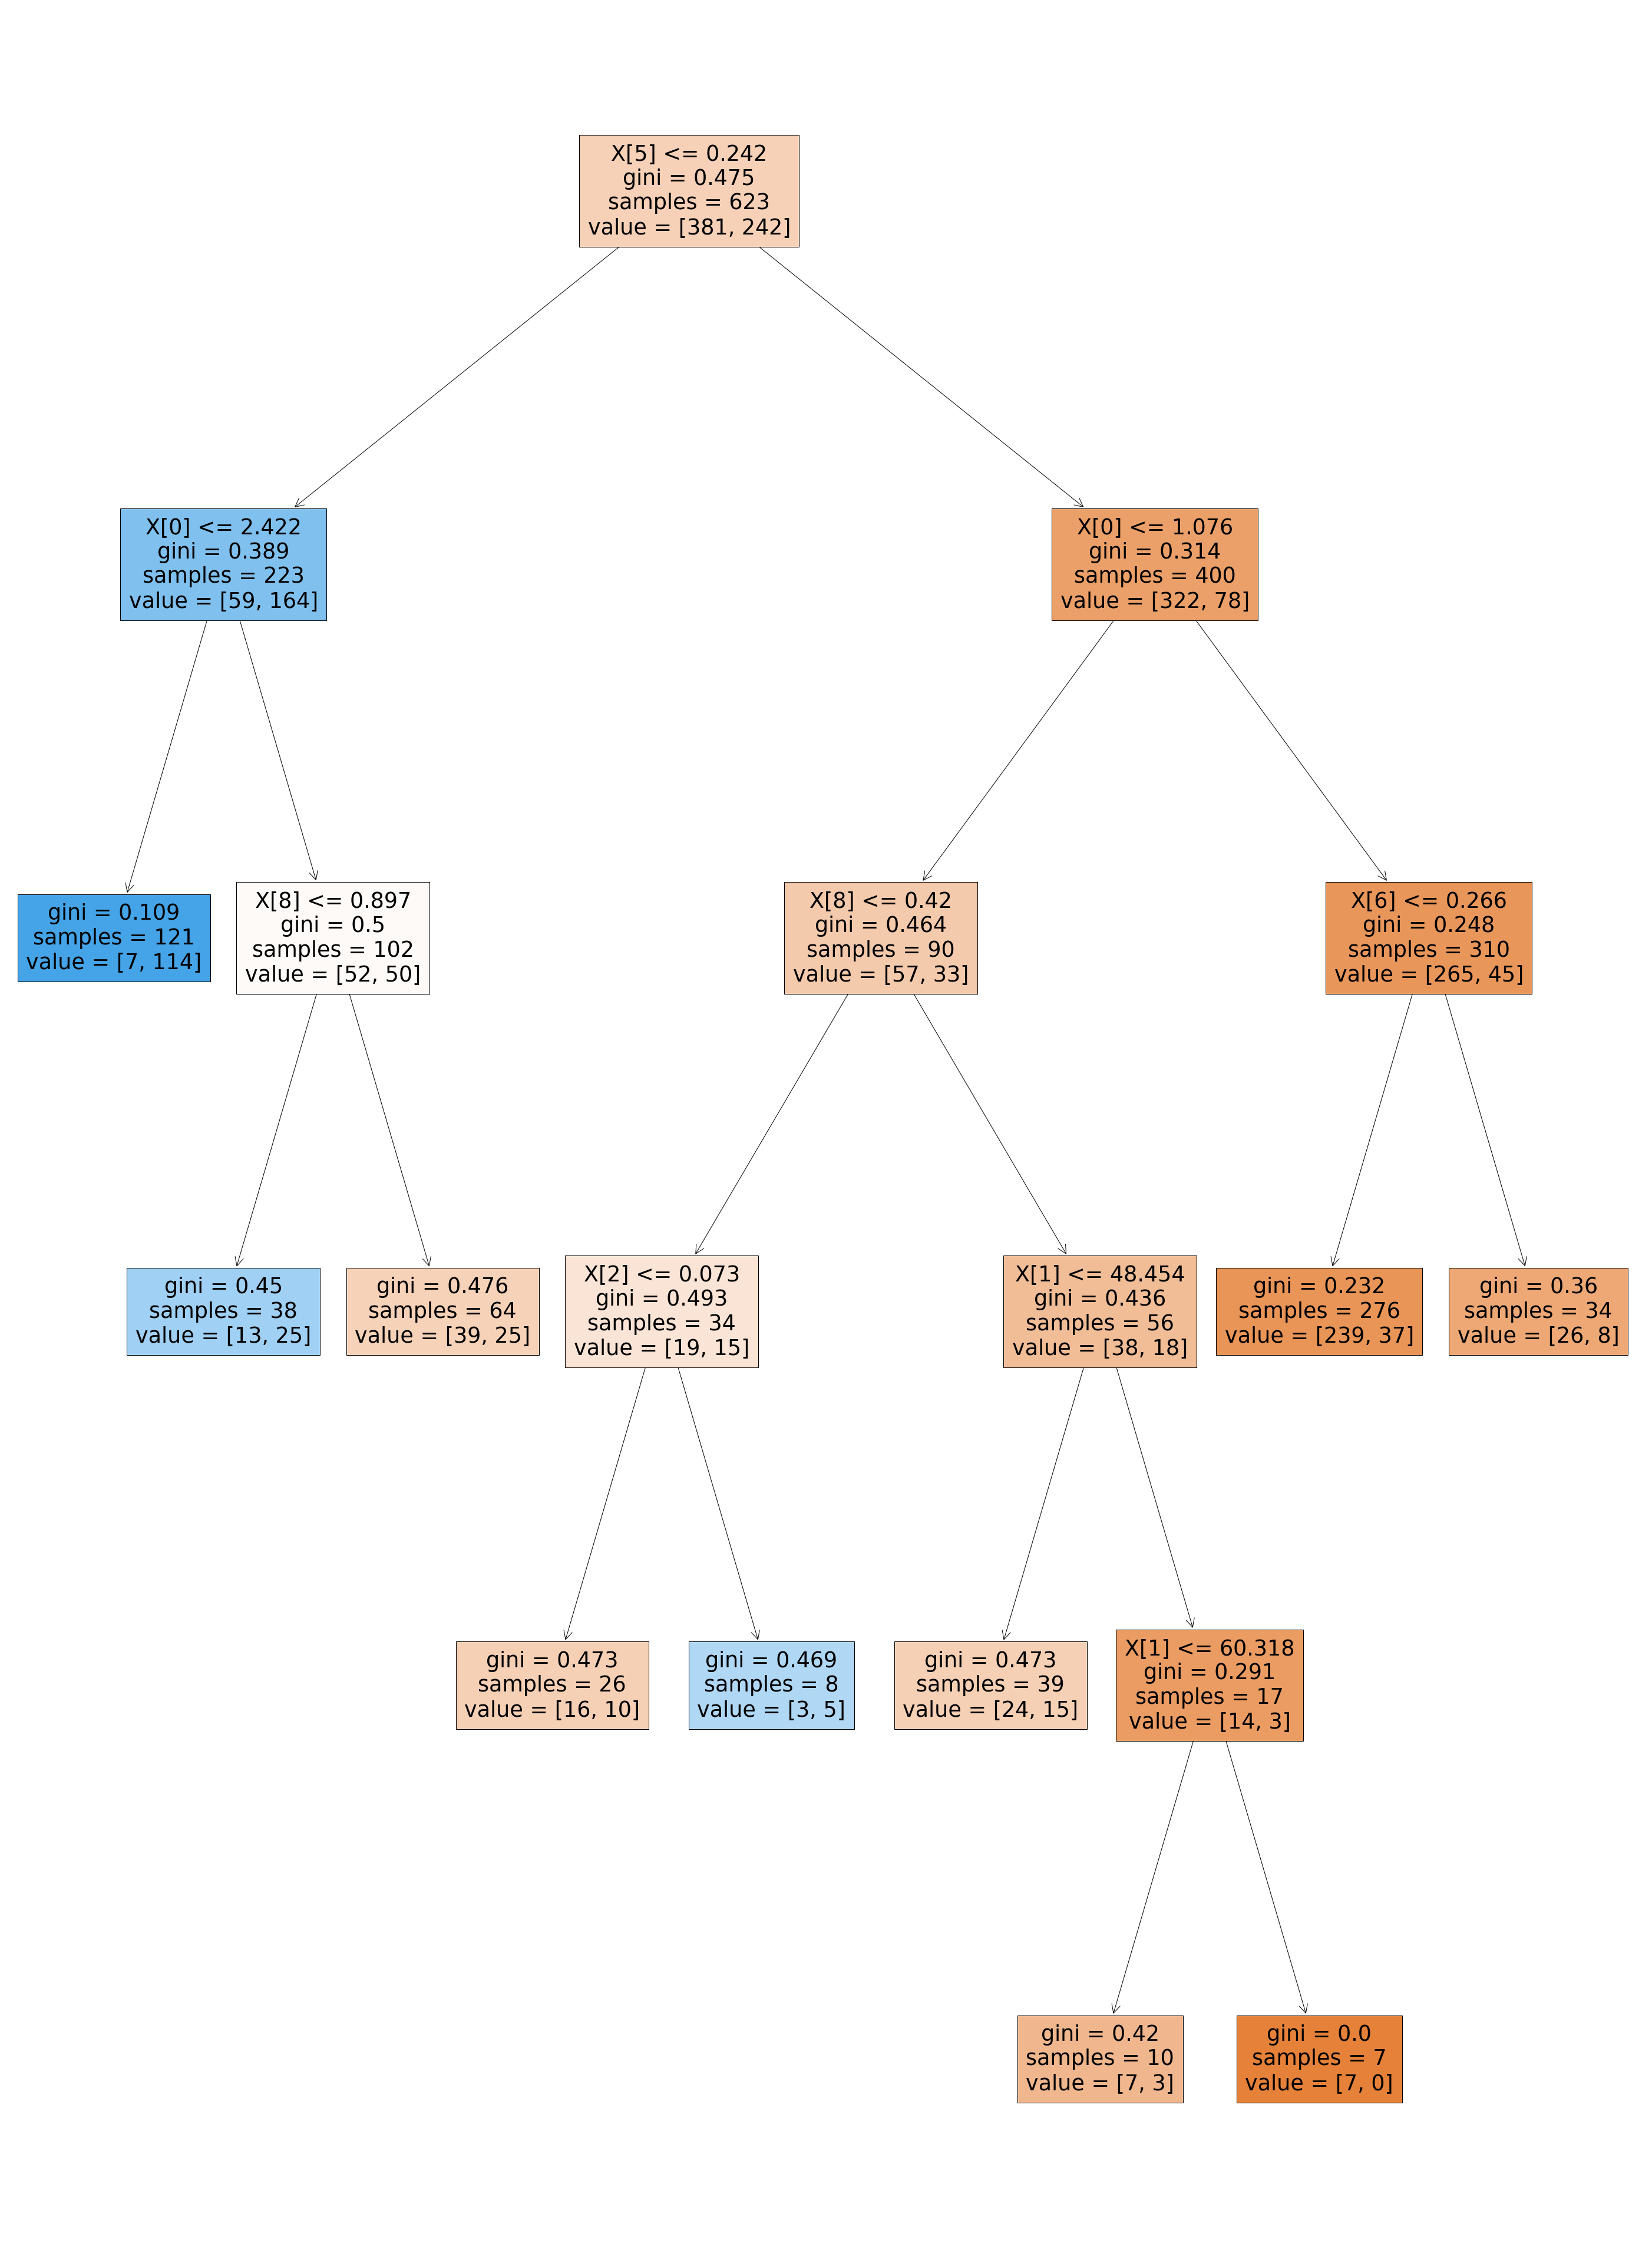

In [49]:
from sklearn.tree import plot_tree
plt.figure(figsize = (50,70))
plot_tree(dtree,filled = True)
plt.show()